In [1]:
!pip install xgboost

You should consider upgrading via the 'C:\Users\Мария\Notebooks\course_work\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [14]:
from xgboost import XGBRegressor

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [15]:
df = pd.read_csv('./data/2020/df_mol2vec.csv')
df.drop(columns = ['Unnamed: 0'], inplace = True)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,292,293,294,295,296,297,298,299,pdbcode,affinity
0,-33.215520,-4.911912,-58.069412,-21.501130,86.036830,-48.711243,-163.09206,-56.392216,177.12903,-0.203314,...,118.41117,87.59636,-135.84192,-56.251205,12.598450,-148.720890,-178.94377,-31.278870,3zzf,0.40
1,-49.548927,-5.533656,-78.656740,11.228692,96.537285,-45.226390,-198.04187,-50.896503,194.37296,13.702780,...,160.35870,97.12160,-164.78786,-62.422604,18.535614,-147.918760,-208.95258,-46.084557,3gww,0.45
2,-23.400223,-7.932979,-35.621426,-2.120256,59.704235,-22.519524,-114.47008,-34.282997,111.38798,7.034303,...,94.77718,61.17864,-83.11074,-31.502813,7.987552,-95.268074,-120.75750,-28.159447,1w8l,0.49
3,-26.764908,-7.937400,-49.278860,-9.648706,69.367480,-31.425886,-146.40346,-37.342216,129.86770,14.527238,...,105.85985,69.64447,-126.76569,-49.138590,1.389015,-115.341490,-158.34018,-35.511227,3fqa,0.49
4,-33.097664,-24.753980,-71.645750,17.423645,76.952320,-45.259354,-184.55115,-47.502502,176.07903,4.592343,...,142.47672,75.98463,-151.25670,-62.206776,0.313482,-147.893430,-202.49968,-42.562164,1zsb,0.60


In [56]:
def draw_all(a, b):
    df_val_draw = pd.DataFrame({'affinity' : a,
                      'prediction' : np.reshape(b, (b.shape[0],))})
    df_val_draw.sort_values(by = 'affinity', inplace = True)

    fig = plt.figure(figsize=(10, 5),dpi=100)
    ax = fig.add_axes([0.1,0.1,0.9,0.9])
    ax.scatter(range(len(a)), df_val_draw.prediction, color = '#50545D', label = 'prediction', linewidth = 0.1)
    ax.plot(range(len(a)), df_val_draw.affinity, color = '#EF476F', label = 'true values', linewidth = 3)
    ax.set_title('Validation')
    ax.legend()

In [57]:
def draw_100(a, b):
    df_val_draw = pd.DataFrame({'affinity' : a,
                      'prediction' : np.reshape(b, (b.shape[0],))})
    df_val_draw.sort_values(by = 'affinity', inplace = True)
    
    fig = plt.figure(figsize=(10, 5),dpi=100)
    ax = fig.add_axes([0.1,0.1,0.9,0.9])
    ax.scatter(range(100), df_val_draw.prediction[1000:1100], color = '#50545D', label = 'prediction', linewidth = 0.1)
    ax.plot(range(100), df_val_draw.affinity[1000:1100], color = '#EF476F', label = 'true values', linewidth = 3)
    ax.set_title('Validation')
    ax.legend()

## split

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import get_scorer_names

In [18]:
df_train = pd.read_csv('./df_train.csv')
df_val = pd.read_csv('./df_val.csv')

In [20]:
code_train = df_train.pdbcode.values
code_val = df_val.pdbcode.values

In [21]:
idx_train = []
idx_val = []

for code in code_train:
    idx = df.index[df.pdbcode == code].to_list()[0]
    idx_train.append(idx)

for code in code_val:
    idx = df.index[df.pdbcode == code].to_list()[0]
    idx_val.append(idx)

In [27]:
y_train = df.iloc[idx_train].affinity.values
y_val = df.iloc[idx_val].affinity.values

In [28]:
x_train = df.drop(columns = ['affinity', 'pdbcode']).iloc[idx_train].to_numpy()
x_val = df.drop(columns = ['affinity', 'pdbcode']).iloc[idx_val].to_numpy()

In [31]:
#x = df.drop(columns = ['affinity']).copy()
#y = df.affinity.copy()

In [32]:
#x_train, x_rem, y_train, y_rem = train_test_split(x, y, train_size=0.7)
#x_val, x_test, y_val, y_test = train_test_split(x_rem, y_rem, test_size=0.33)

In [33]:
#train_code = x_train.pdbcode.values
#val_code = x_val.pdbcode.values
#test_code = x_test.pdbcode.values

In [34]:
#x_train = x_train.drop(columns = ['pdbcode']).to_numpy(copy = True)
#x_val = x_val.drop(columns = ['pdbcode']).to_numpy(copy = True)
#x_test = x_test.drop(columns = ['pdbcode']).to_numpy(copy = True)

In [35]:
#df_train_to_save = pd.DataFrame({'pdbcode': train_code})
#df_test_to_save = pd.DataFrame({'pdbcode': test_code})

In [36]:
#df_results = pd.DataFrame({'pdbcode': val_code})

## xgboost 1

In [37]:
#get_scorer_names()

In [38]:
m1 = XGBRegressor()
m1.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [39]:
pred_train = m1.predict(x_train)
pred_val = m1.predict(x_val)

In [41]:
print('train mae, rmse:')
print(mean_absolute_error(pred_train, y_train), mean_squared_error(pred_train, y_train, squared = False))
print('')
print('val mae, rmse:')
print(mean_absolute_error(pred_val, y_val), mean_squared_error(pred_val, y_val, squared = False))

train mae, rmse:
0.49172550135432336 0.6496360633573421

val mae, rmse:
1.1700482831886199 1.4926783862792117


In [43]:
#df_results['affinity'] = y_val.values
df_val['xgb_1'] = pred_val
df_val.head()

,Unnamed: 0,pdbcode,affinity,xgb_1,svr_1,rfr_1,xgb_2,rdk_fp1,rdk_fp2,morgan_fp2,morgan_fp2_1,morgan_fp2_2,morgan_fp3_1,morgan_fp3_2,morgan_fp4_1,morgan_fp4_2,morgan_fp4_0,cnn40
0,0,2lpr,8.89,7.209635,5.920772,6.6718,7.209635,7.102837,6.486600,6.511612,6.511612,6.716847,6.706553,7.593198,6.710745,7.206213,9.141084,6.318223
1,1,1h2u,7.89,7.465891,6.755027,6.6110,7.465891,5.739731,5.488383,4.645041,4.645041,5.217583,6.224686,4.799677,5.760769,4.794360,7.941810,6.403734
2,2,3u7m,7.45,7.497168,6.453127,7.0290,7.497168,7.124549,6.118441,6.859010,6.859010,7.462400,7.205012,6.985705,7.151359,6.909961,7.321925,5.371461
3,3,3njq,4.89,6.430411,5.662477,5.3725,6.430411,5.013769,5.260462,5.092042,5.092042,6.820109,4.330926,5.191402,6.228066,6.575990,4.926351,5.893730
4,4,3gus,6.05,4.366631,4.717553,4.9912,4.366631,4.779075,5.204380,5.234831,5.234831,6.342001,4.746444,6.664507,6.005354,6.947673,6.259382,5.340178


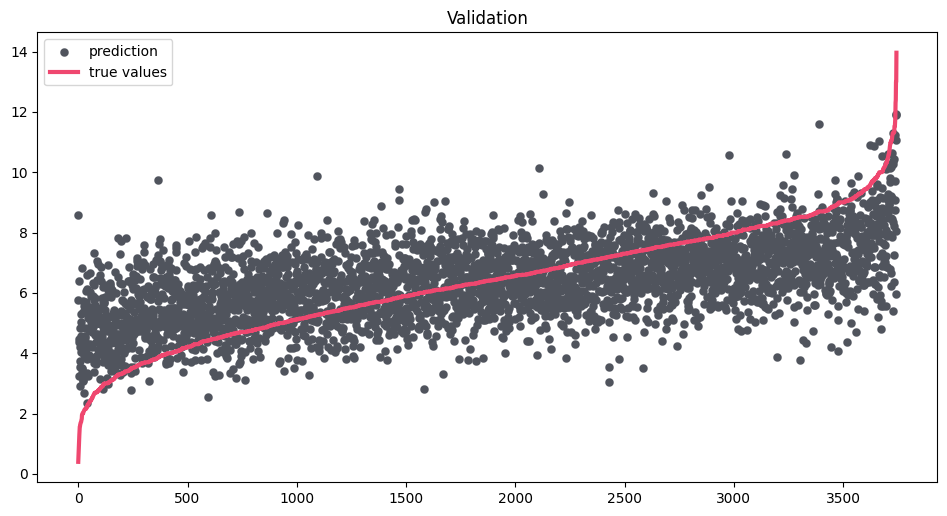

In [58]:
draw_all(y_val, pred_val)

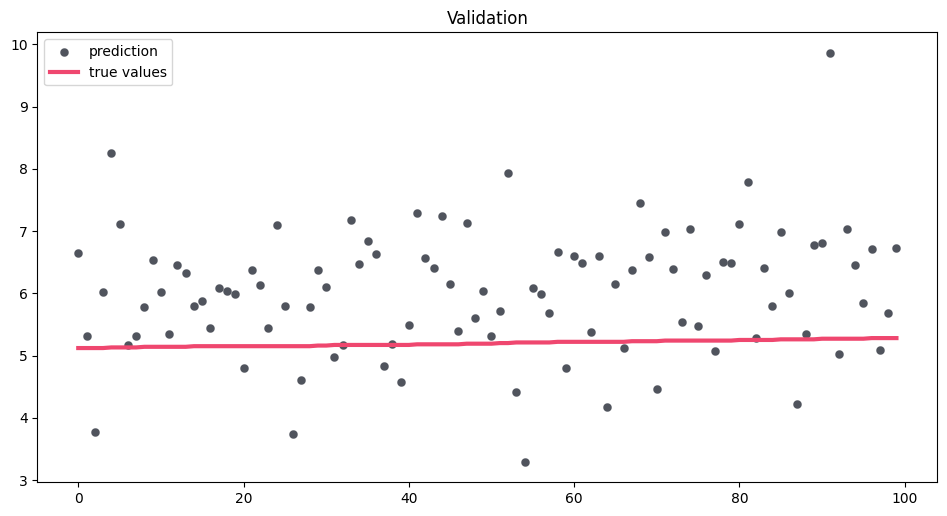

In [59]:
draw_100(y_val, pred_val)

## xgboost2

params = {
    'learning_rate' : [0.1, 0.01, 0.001],
    'max_depth' : [3, 6],
    'n_estimators' : [100, 200],
    'n_jobs' : [0]
}

In [48]:
m2 = XGBRegressor(n_estimators = 200, learning_rate = 0.1, max_depth = 6)
m2.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=200, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [49]:
pred_train2 = m2.predict(x_train)
pred_val2 = m2.predict(x_val)

In [50]:
print('train mae, mse:')
print(mean_absolute_error(pred_train2, y_train), mean_squared_error(pred_train2, y_train))
print('')
print('val mae, mse:')
print(mean_absolute_error(pred_val2, y_val), mean_squared_error(pred_val2, y_val))

train mae, mse:
0.6296868869831356 0.6658353719637783

val mae, mse:
1.1467709447532215 2.1127508402720148


In [51]:
df_val['xgb_2'] = pred_val2
df_val.head()

,Unnamed: 0,pdbcode,affinity,xgb_1,svr_1,rfr_1,xgb_2,rdk_fp1,rdk_fp2,morgan_fp2,morgan_fp2_1,morgan_fp2_2,morgan_fp3_1,morgan_fp3_2,morgan_fp4_1,morgan_fp4_2,morgan_fp4_0,cnn40
0,0,2lpr,8.89,7.209635,5.920772,6.6718,6.668467,7.102837,6.486600,6.511612,6.511612,6.716847,6.706553,7.593198,6.710745,7.206213,9.141084,6.318223
1,1,1h2u,7.89,7.465891,6.755027,6.6110,6.013956,5.739731,5.488383,4.645041,4.645041,5.217583,6.224686,4.799677,5.760769,4.794360,7.941810,6.403734
2,2,3u7m,7.45,7.497168,6.453127,7.0290,6.885041,7.124549,6.118441,6.859010,6.859010,7.462400,7.205012,6.985705,7.151359,6.909961,7.321925,5.371461
3,3,3njq,4.89,6.430411,5.662477,5.3725,4.861192,5.013769,5.260462,5.092042,5.092042,6.820109,4.330926,5.191402,6.228066,6.575990,4.926351,5.893730
4,4,3gus,6.05,4.366631,4.717553,4.9912,5.002330,4.779075,5.204380,5.234831,5.234831,6.342001,4.746444,6.664507,6.005354,6.947673,6.259382,5.340178


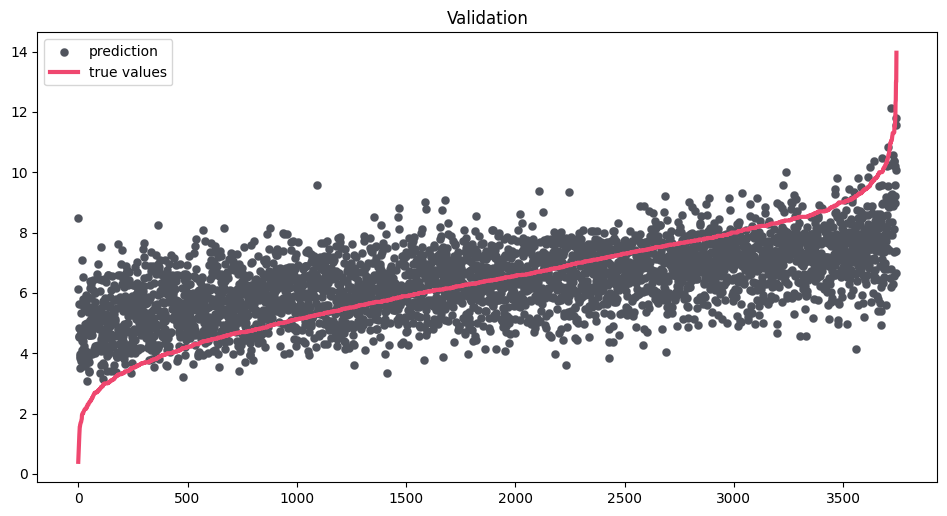

In [60]:
draw_all(y_val, pred_val2)

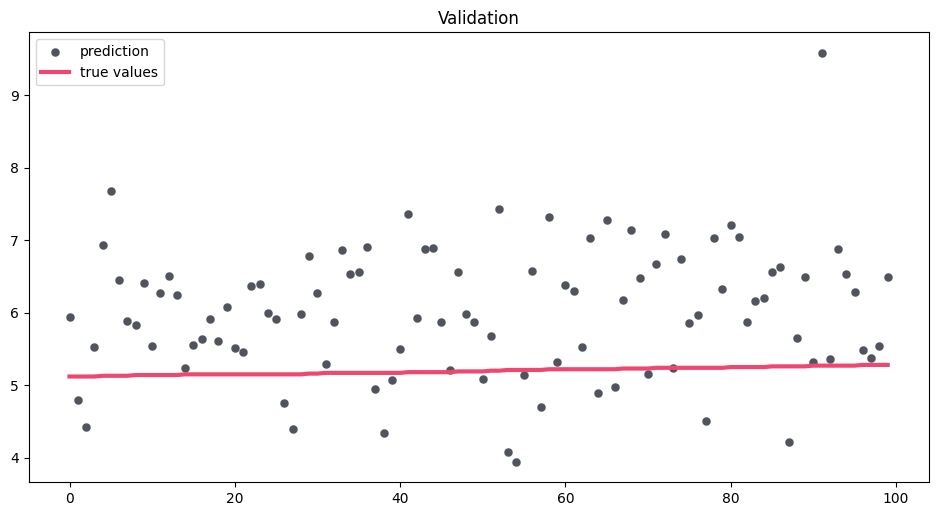

In [61]:
draw_100(y_val, pred_val2)

## feature engineering

In [62]:
scaler = MinMaxScaler((0, 10))

In [63]:
scaler.fit(x_train)

MinMaxScaler(feature_range=(0, 10))

In [64]:
x_train_scaled = scaler.transform(x_train)
x_train_scaled

array([[5.62658603, 4.56767304, 6.62867633, ..., 6.30199044, 6.12491503,
        6.11821551],
       [7.1466158 , 5.04950689, 7.75600616, ..., 7.72153983, 7.48136444,
        7.94188823],
       [6.91024493, 4.1958345 , 6.18414402, ..., 6.8880573 , 6.54540369,
        5.83660102],
       ...,
       [6.1589581 , 5.66045342, 6.48508476, ..., 6.19931905, 6.46715936,
        5.66861661],
       [7.47245169, 5.93237901, 7.91741014, ..., 7.07995105, 7.30168916,
        7.62349013],
       [7.17380548, 5.03382039, 7.18800208, ..., 7.05351583, 7.16020339,
        6.54733731]])

In [65]:
x_val_scaled = scaler.transform(x_val)

## SVR

In [66]:
m3 = SVR()
m3.fit(x_train_scaled, y_train)

SVR()

In [67]:
pred_train3 = m3.predict(x_train_scaled)
pred_val3 = m3.predict(x_val_scaled)

In [68]:
print('train mae, rmse:')
print(mean_absolute_error(pred_train3, y_train), mean_squared_error(pred_train3, y_train, squared = False))
print('')
print('val mae, rmse:')
print(mean_absolute_error(pred_val3, y_val), mean_squared_error(pred_val3, y_val, squared = False))

train mae, rmse:
1.2018582416767978 1.5308395990156505

val mae, rmse:
1.2473476107407075 1.572126933730495


In [69]:
df_val['svr_1'] = pred_val3
df_val.head()

,Unnamed: 0,pdbcode,affinity,xgb_1,svr_1,rfr_1,xgb_2,rdk_fp1,rdk_fp2,morgan_fp2,morgan_fp2_1,morgan_fp2_2,morgan_fp3_1,morgan_fp3_2,morgan_fp4_1,morgan_fp4_2,morgan_fp4_0,cnn40
0,0,2lpr,8.89,7.209635,5.920772,6.6718,6.668467,7.102837,6.486600,6.511612,6.511612,6.716847,6.706553,7.593198,6.710745,7.206213,9.141084,6.318223
1,1,1h2u,7.89,7.465891,6.755027,6.6110,6.013956,5.739731,5.488383,4.645041,4.645041,5.217583,6.224686,4.799677,5.760769,4.794360,7.941810,6.403734
2,2,3u7m,7.45,7.497168,6.453127,7.0290,6.885041,7.124549,6.118441,6.859010,6.859010,7.462400,7.205012,6.985705,7.151359,6.909961,7.321925,5.371461
3,3,3njq,4.89,6.430411,5.662477,5.3725,4.861192,5.013769,5.260462,5.092042,5.092042,6.820109,4.330926,5.191402,6.228066,6.575990,4.926351,5.893730
4,4,3gus,6.05,4.366631,4.717553,4.9912,5.002330,4.779075,5.204380,5.234831,5.234831,6.342001,4.746444,6.664507,6.005354,6.947673,6.259382,5.340178


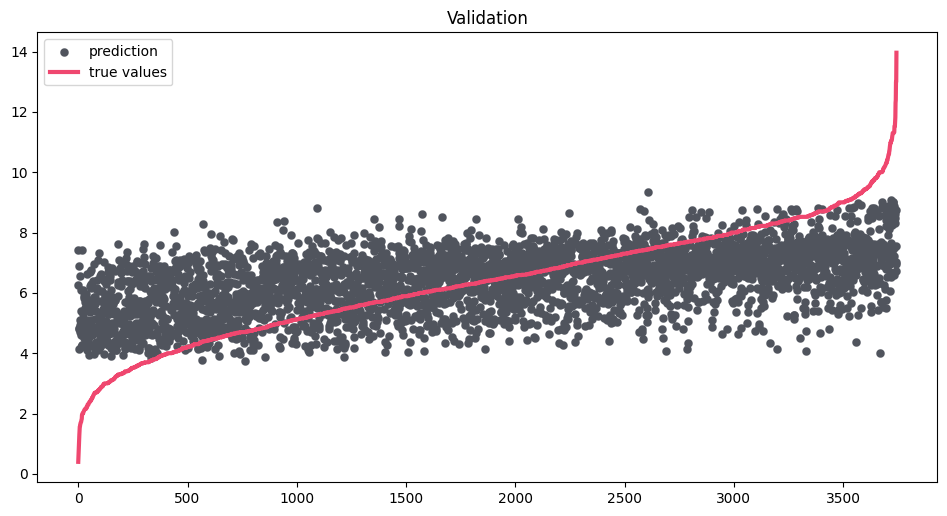

In [70]:
draw_all(y_val, pred_val3)

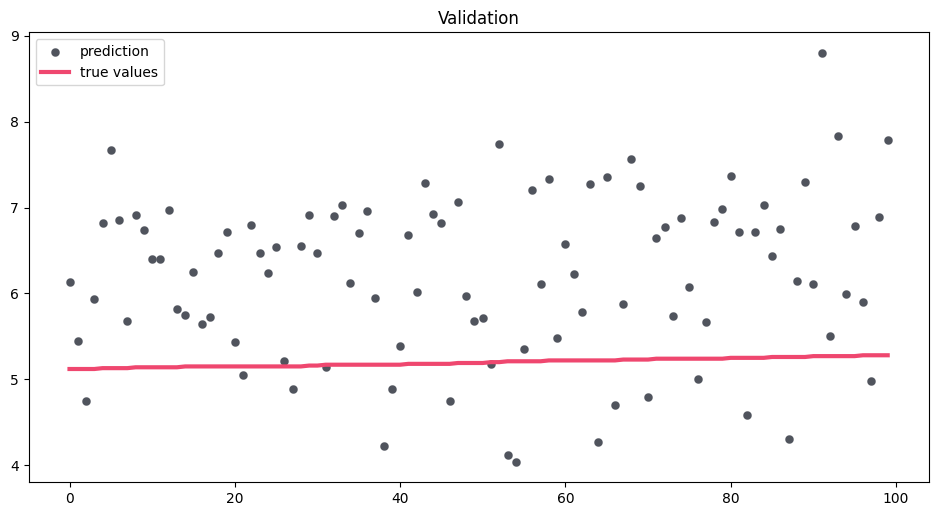

In [71]:
draw_100(y_val, pred_val3)

## RFR_1

In [72]:
m4 = RandomForestRegressor(random_state=0)
m4.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

In [73]:
pred_train4 = m4.predict(x_train)
pred_val4 = m4.predict(x_val)

In [74]:
print('train mae, rmse:')
print(mean_absolute_error(pred_train4, y_train), mean_squared_error(pred_train4, y_train, squared = False))
print('')
print('val mae, rmse:')
print(mean_absolute_error(pred_val4, y_val), mean_squared_error(pred_val4, y_val, squared = False))

train mae, rmse:
0.41639207615068413 0.5360884277609345

val mae, rmse:
1.1296977146035985 1.4385838910056223


In [75]:
df_val['rfr_1'] = pred_val4
df_val.head()

,Unnamed: 0,pdbcode,affinity,xgb_1,svr_1,rfr_1,xgb_2,rdk_fp1,rdk_fp2,morgan_fp2,morgan_fp2_1,morgan_fp2_2,morgan_fp3_1,morgan_fp3_2,morgan_fp4_1,morgan_fp4_2,morgan_fp4_0,cnn40
0,0,2lpr,8.89,7.209635,5.920772,6.6718,6.668467,7.102837,6.486600,6.511612,6.511612,6.716847,6.706553,7.593198,6.710745,7.206213,9.141084,6.318223
1,1,1h2u,7.89,7.465891,6.755027,6.6110,6.013956,5.739731,5.488383,4.645041,4.645041,5.217583,6.224686,4.799677,5.760769,4.794360,7.941810,6.403734
2,2,3u7m,7.45,7.497168,6.453127,7.0290,6.885041,7.124549,6.118441,6.859010,6.859010,7.462400,7.205012,6.985705,7.151359,6.909961,7.321925,5.371461
3,3,3njq,4.89,6.430411,5.662477,5.3725,4.861192,5.013769,5.260462,5.092042,5.092042,6.820109,4.330926,5.191402,6.228066,6.575990,4.926351,5.893730
4,4,3gus,6.05,4.366631,4.717553,4.9912,5.002330,4.779075,5.204380,5.234831,5.234831,6.342001,4.746444,6.664507,6.005354,6.947673,6.259382,5.340178


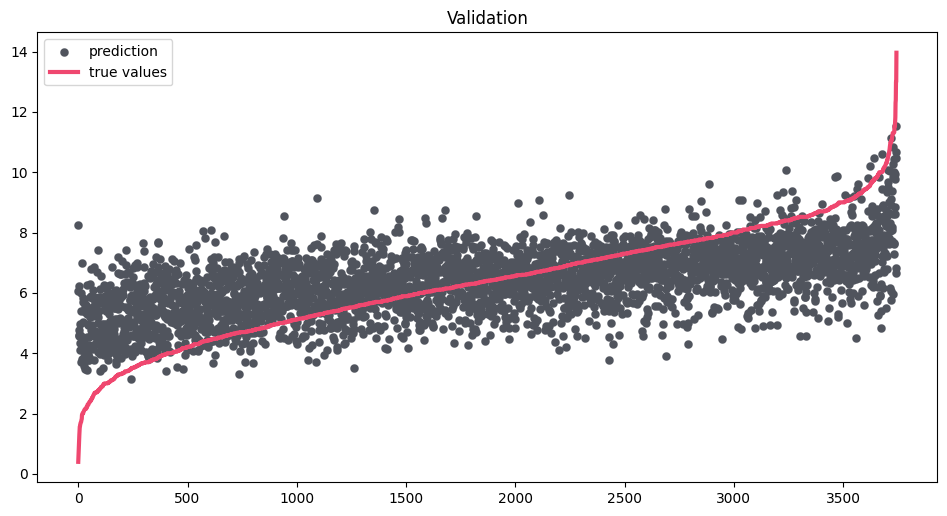

In [78]:
draw_all(y_val, pred_val4)

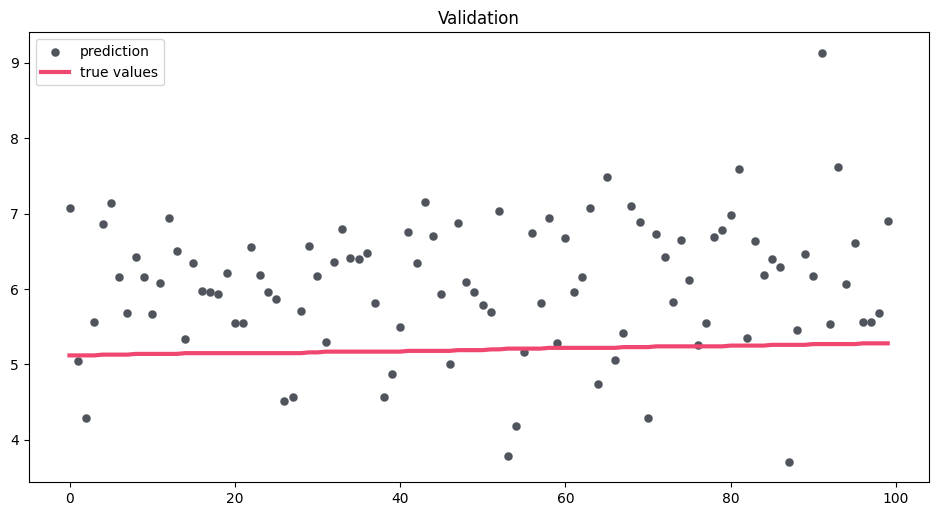

In [79]:
draw_100(y_val, pred_val4)

## RFR_2 + GS

In [80]:
m5 = RandomForestRegressor(random_state=0, n_estimators = 200)
m5.fit(x_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=0)

In [81]:
pred_train5 = m5.predict(x_train)
pred_val5 = m5.predict(x_val)

In [82]:
print('train mae, rmse:')
print(mean_absolute_error(pred_train5, y_train), mean_squared_error(pred_train5, y_train, squared = False))
print('')
print('val mae, rmse:')
print(mean_absolute_error(pred_val5, y_val), mean_squared_error(pred_val5, y_val, squared = False))

train mae, rmse:
0.41342077847322595 0.5302148425937839

val mae, rmse:
1.127845583921419 1.435462198323882


In [83]:
df_val['rfr_2'] = pred_val5
df_val.head()

,Unnamed: 0,pdbcode,affinity,xgb_1,svr_1,rfr_1,xgb_2,rdk_fp1,rdk_fp2,morgan_fp2,morgan_fp2_1,morgan_fp2_2,morgan_fp3_1,morgan_fp3_2,morgan_fp4_1,morgan_fp4_2,morgan_fp4_0,cnn40,rfr_2
0,0,2lpr,8.89,7.209635,5.920772,6.6718,6.668467,7.102837,6.486600,6.511612,6.511612,6.716847,6.706553,7.593198,6.710745,7.206213,9.141084,6.318223,6.61930
1,1,1h2u,7.89,7.465891,6.755027,6.6110,6.013956,5.739731,5.488383,4.645041,4.645041,5.217583,6.224686,4.799677,5.760769,4.794360,7.941810,6.403734,6.57590
2,2,3u7m,7.45,7.497168,6.453127,7.0290,6.885041,7.124549,6.118441,6.859010,6.859010,7.462400,7.205012,6.985705,7.151359,6.909961,7.321925,5.371461,7.01115
3,3,3njq,4.89,6.430411,5.662477,5.3725,4.861192,5.013769,5.260462,5.092042,5.092042,6.820109,4.330926,5.191402,6.228066,6.575990,4.926351,5.893730,5.34665
4,4,3gus,6.05,4.366631,4.717553,4.9912,5.002330,4.779075,5.204380,5.234831,5.234831,6.342001,4.746444,6.664507,6.005354,6.947673,6.259382,5.340178,4.85480


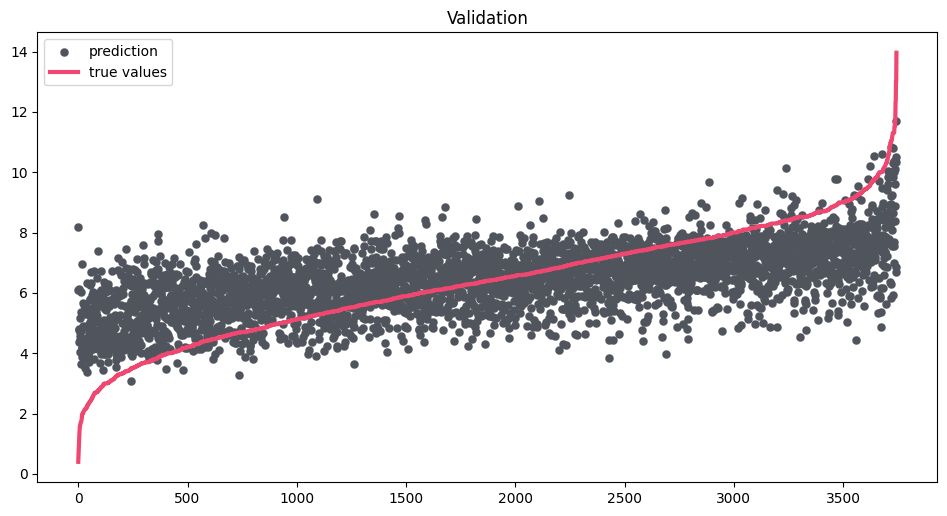

In [84]:
draw_all(y_val, pred_val5)

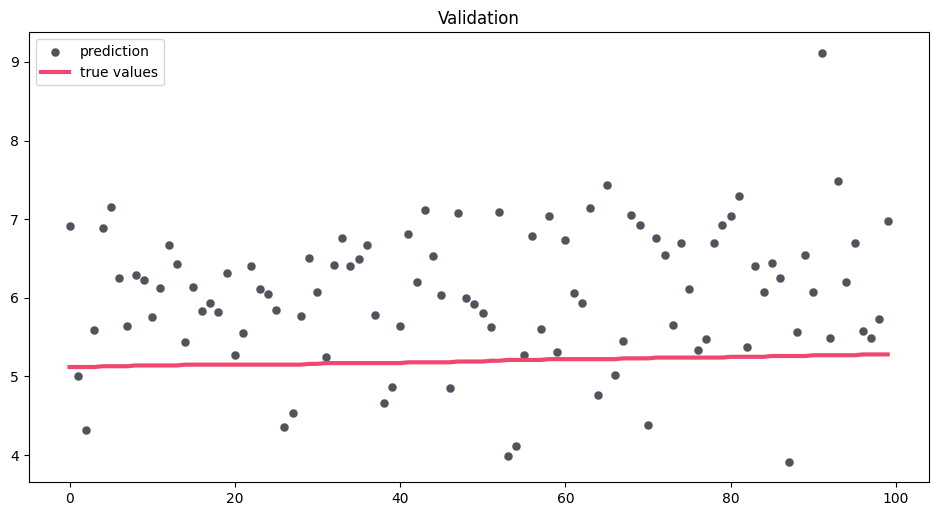

In [85]:
draw_100(y_val, pred_val5)

In [86]:
df_val.to_csv('./df_val.csv')